In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import binance_framework as bf
from collections import deque
import random

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [3]:
CURRENCIES = ['ETHUSDT','BTCUSDT', 'XRPUSDT','LTCUSDT']
TARGET_CURRENCY = 'ETHUSDT'
SEQUENCE_LEN = 128
FUTURE_PERIOD_PREDICT = 5
RATIO_TO_PREDICT = 'ETHUSDT'
EPOCHS = 20
BATCH_SIZE = 128
NAME = 'SEQ-'+ str(SEQUENCE_LEN)+'-FUTPRED-'+str(FUTURE_PERIOD_PREDICT)+'-PRED-'+str(time.time())

In [4]:
#coins = bf.get_data_by_intervals(300,CURRENCIES,bf.INTERVAL_1MINUTE)

In [5]:
#coins.to_csv('all_1min_300.csv',index=False)

In [6]:
coins  = pd.read_csv('all_1min_300.csv')

In [7]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149701 entries, 0 to 149700
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ETHUSDT Open Time                     149701 non-null  int64  
 1   ETHUSDT Open                          149701 non-null  float64
 2   ETHUSDT High                          149701 non-null  float64
 3   ETHUSDT Low                           149701 non-null  float64
 4   ETHUSDT Close                         149701 non-null  float64
 5   ETHUSDT Volume                        149701 non-null  float64
 6   ETHUSDT Close Time                    149701 non-null  int64  
 7   ETHUSDT Quote asset volume            149701 non-null  float64
 8   ETHUSDT n_trades                      149701 non-null  int64  
 9   ETHUSDT Taker buy base asset volume   149701 non-null  float64
 10  ETHUSDT Taker buy quote asset volume  149701 non-null  float64
 11  

In [8]:
coins.head()

,ETHUSDT Open Time,ETHUSDT Open,ETHUSDT High,ETHUSDT Low,ETHUSDT Close,ETHUSDT Volume,ETHUSDT Close Time,ETHUSDT Quote asset volume,ETHUSDT n_trades,ETHUSDT Taker buy base asset volume,...,LTCUSDT High,LTCUSDT Low,LTCUSDT Close,LTCUSDT Volume,LTCUSDT Close Time,LTCUSDT Quote asset volume,LTCUSDT n_trades,LTCUSDT Taker buy base asset volume,LTCUSDT Taker buy quote asset volume,LTCUSDT Ignore
0,1574785080000,145.99,146.08,145.87,145.88,241.28503,1574785139999,35218.416693,84,49.68388,...,46.66,46.59,46.59,28.24642,1574785139999,1316.735587,20,9.04073,421.691594,0
1,1574785140000,145.89,145.96,145.84,145.96,40.85429,1574785199999,5959.466443,49,20.42048,...,46.60,46.58,46.58,80.79035,1574785199999,3763.360087,10,7.27921,339.211186,0
2,1574785200000,145.98,145.98,145.78,145.81,140.04726,1574785259999,20423.385381,68,35.84368,...,46.61,46.57,46.57,85.55753,1574785259999,3985.330867,7,18.02712,840.244063,0
3,1574785260000,145.81,145.82,145.63,145.74,305.43565,1574785319999,44519.270184,117,173.11928,...,46.56,46.49,46.51,325.49714,1574785319999,15139.718570,42,90.97910,4232.232356,0
4,1574785320000,145.74,145.81,145.70,145.77,86.54447,1574785379999,12612.838273,52,18.12635,...,46.52,46.49,46.52,62.84014,1574785379999,2922.416068,15,16.18125,752.621786,0


In [9]:
bf.show_time_skips(coins, CURRENCIES)

First time difference is:  60000


ETHUSDT Time difference:  3660000
starting at index:  107141
ending at index:    107142
total frames since previous timeskip:  107141


ETHUSDT Time difference:  32299
starting at index:  122056
ending at index:    122057
total frames since previous timeskip:  14915


ETHUSDT Time difference:  21327701
starting at index:  122057
ending at index:    122058
total frames since previous timeskip:  1


ETHUSDT Time difference:  46701
starting at index:  141728
ending at index:    141729
total frames since previous timeskip:  19671


ETHUSDT Time difference:  7753299
starting at index:  141729
ending at index:    141730
total frames since previous timeskip:  1
First time difference is:  60000


BTCUSDT Time difference:  3660000
starting at index:  107141
ending at index:    107142
total frames since previous timeskip:  107141


BTCUSDT Time difference:  32287
starting at index:  122056
ending at index:    122057
total frames since previous timeskip:  14915


In [10]:
coins = coins[0:107141]
len(coins)

107141

In [11]:
bf.show_time_skips(coins, CURRENCIES)

First time difference is:  60000
First time difference is:  60000
First time difference is:  60000
First time difference is:  60000


In [12]:
bf.keep_one_timestamp(coins,CURRENCIES)

In [13]:
bf.remove_ignore_columns(coins,CURRENCIES)

In [14]:
coins.head()

,ETHUSDT Open,ETHUSDT High,ETHUSDT Low,ETHUSDT Close,ETHUSDT Volume,ETHUSDT Quote asset volume,ETHUSDT n_trades,ETHUSDT Taker buy base asset volume,ETHUSDT Taker buy quote asset volume,BTCUSDT Open,...,LTCUSDT Open,LTCUSDT High,LTCUSDT Low,LTCUSDT Close,LTCUSDT Volume,LTCUSDT Quote asset volume,LTCUSDT n_trades,LTCUSDT Taker buy base asset volume,LTCUSDT Taker buy quote asset volume,Timestamp
0,145.99,146.08,145.87,145.88,241.28503,35218.416693,84,49.68388,7254.209112,7126.39,...,46.64,46.66,46.59,46.59,28.24642,1316.735587,20,9.04073,421.691594,1574785139999
1,145.89,145.96,145.84,145.96,40.85429,5959.466443,49,20.42048,2978.871293,7125.07,...,46.58,46.60,46.58,46.58,80.79035,3763.360087,10,7.27921,339.211186,1574785199999
2,145.98,145.98,145.78,145.81,140.04726,20423.385381,68,35.84368,5227.199591,7123.66,...,46.61,46.61,46.57,46.57,85.55753,3985.330867,7,18.02712,840.244063,1574785259999
3,145.81,145.82,145.63,145.74,305.43565,44519.270184,117,173.11928,25234.657077,7118.69,...,46.56,46.56,46.49,46.51,325.49714,15139.718570,42,90.97910,4232.232356,1574785319999
4,145.74,145.81,145.70,145.77,86.54447,12612.838273,52,18.12635,2641.885972,7114.84,...,46.52,46.52,46.49,46.52,62.84014,2922.416068,15,16.18125,752.621786,1574785379999


In [15]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107141 entries, 0 to 107140
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ETHUSDT Open                          107141 non-null  float64
 1   ETHUSDT High                          107141 non-null  float64
 2   ETHUSDT Low                           107141 non-null  float64
 3   ETHUSDT Close                         107141 non-null  float64
 4   ETHUSDT Volume                        107141 non-null  float64
 5   ETHUSDT Quote asset volume            107141 non-null  float64
 6   ETHUSDT n_trades                      107141 non-null  int64  
 7   ETHUSDT Taker buy base asset volume   107141 non-null  float64
 8   ETHUSDT Taker buy quote asset volume  107141 non-null  float64
 9   BTCUSDT Open                          107141 non-null  float64
 10  BTCUSDT High                          107141 non-null  float64
 11  

In [16]:
coins.index[0]

0

In [17]:
print('Data timeline:')
print('From: ',datetime.fromtimestamp(coins['Timestamp'].iloc[0]/1000))
print('To:   ', datetime.fromtimestamp(coins['Timestamp'].iloc[-1]/1000))

Data timeline:
From:  2019-11-26 17:18:59.999000
To:    2020-02-09 02:58:59.999000


In [18]:
STEPS_IN_FUTURE = 15
PAST_DATA_SIZE = 120 #2*60
n_frames = int(len(coins)/PAST_DATA_SIZE)
n_frames

892

In [19]:
def preprocess_data(df, start_index, end_index, PAST_DATA_SIZE, STEPS_IN_FUTURE, TARGET_CURRENCY):
    X_features = []
    y_target = []
    n_frames = int((end_index/PAST_DATA_SIZE)-1)
    for frame in range(start_index, n_frames):
        X_features.append([])
        y_target.append([])
        for i in range(frame, (frame+PAST_DATA_SIZE)):
            X_features[frame].append(df.loc[i].values)
        for k in range(frame+PAST_DATA_SIZE, frame+PAST_DATA_SIZE+STEPS_IN_FUTURE):
            y_target[frame].append(df[TARGET_CURRENCY+' Close'].loc[k])
            
    return np.array(X_features), np.array(y_target) 

In [20]:
X, y = preprocess_data(coins,0,len(coins), PAST_DATA_SIZE, STEPS_IN_FUTURE, TARGET_CURRENCY)

In [21]:
X_test = X[-200:]
y_test = y[-200:]
X_train = X[:len(X)-200]
y_train = y[:len(y)-200]

In [22]:
X_test.shape

(200, 120, 37)

In [23]:
BUFFER_SIZE = 1000
STEP = 15
train_data_multi = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
def create_time_steps(length):
    return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
        label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
        plt.legend(loc='upper left')
        plt.show()

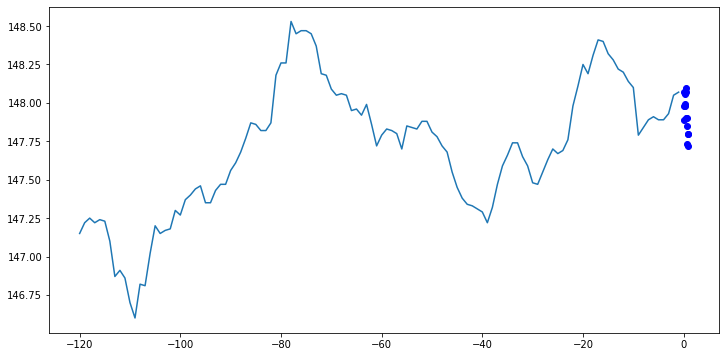

In [33]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [37]:
X_train.shape[-2:]

(120, 37)

In [42]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(37,
                                          return_sequences=True,
                                          input_shape=X_train.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(15))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [43]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=50,
                                          steps_per_epoch=100,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Train for 100 steps, validate for 50 steps
Epoch 1/50
100/100 [==============================] - 17s 167ms/step - loss: 135.7111 - val_loss: 99.7166
Epoch 2/50
100/100 [==============================] - 14s 141ms/step - loss: 76.1399 - val_loss: 51.1504
Epoch 3/50
100/100 [==============================] - 14s 144ms/step - loss: 46.5415 - val_loss: 40.6219
Epoch 4/50
100/100 [==============================] - 13s 134ms/step - loss: 98.0499 - val_loss: 28.7078
Epoch 5/50
100/100 [==============================] - 14s 137ms/step - loss: 24.0253 - val_loss: 22.0304
Epoch 6/50
100/100 [==============================] - 14s 142ms/step - loss: 29.2483 - val_loss: 2.1938
Epoch 7/50
100/100 [==============================] - 14s 140ms/step - loss: 7.5886 - val_loss: 12.9913
Epoch 8/50
100/100 [==============================] - 15s 149ms/step - loss: 15.7711 - val_loss: 16.7351
Epoch 9/50
100/100 [==============================] - 14s 136ms/step - loss: 15.1251 - val_loss: 17.5104
Epoch 10/50
1

KeyboardInterrupt: 

In [46]:
multi_step_model.predict(val_data_multi,steps=15)

array([[121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265],
       [121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265],
       [121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265],
       ...,
       [121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265],
       [121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265],
       [121.77713 , 120.62219 , 121.40732 , ..., 122.2813  , 121.528015,
        121.296265]], dtype=float32)

In [ ]:
from sklearn.metricks import 